In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
import phys
from scipy.optimize import curve_fit
mpld3.enable_notebook()

In [2]:
z = 0.0231959  # redshift determined by Na D line

In [54]:
def Gaussian(wv, wv0, min_velocity, width_velocity, intensity):
    wv0_obs = wv0 * (1 + z)
    velocity = (wv / wv0_obs - 1) * phys.c
    return intensity * np.exp(-0.5 * ((velocity - min_velocity) / width_velocity)**2)

In [55]:
def Model(wv, a, b,
          Si_min_vel, Si_width_vel, Si_intensity, 
          C_min_vel, C_width_vel, C_intensity):
    Si_wv0 = 6355
    C_wv0 = 6580
    Si_flux = 1 - Gaussian(wv, Si_wv0, Si_min_vel, Si_width_vel, Si_intensity)
    C_flux = 1 - Gaussian(wv, C_wv0, C_min_vel, C_width_vel, C_intensity)
    continuum = a * wv + b
    return continuum * Si_flux * C_flux

In [56]:
def FitCAndSiLines(filename, p0, lambda0=6050, lambda1=6600):
    spec = np.genfromtxt(filename, names=["wavelength", "flux"])
    idx = np.logical_and(spec["wavelength"] > 6050, 
                         spec["wavelength"] < 6600)
    spec = spec[idx]
    spec["flux"] /= np.median(spec["flux"])
    plt.plot(spec["wavelength"], spec["flux"], color="gray")

    popt, pcov = curve_fit(Model, spec["wavelength"], spec["flux"],
                           p0=p0)

    wv = np.linspace(spec["wavelength"].min(), spec["wavelength"].max(), 1001)
    plt.plot(wv, Model(wv, *popt), color='k')

    c = np.sqrt(2. * np.pi) / phys.c
    
    Si_min_vel = popt[2]
    Si_min_vel_err = np.sqrt(pcov[2][2])
    Si_width_vel = popt[3]
    Si_width_vel_err = np.sqrt(pcov[3][3])
    Si_intensity = popt[4]
    Si_intensity_err = np.sqrt(pcov[4][4])
    Si_EW = c * 6355 * Si_intensity * Si_width_vel
    Si_EW_err = c * 6355 * ((Si_intensity_err / Si_intensity)**2 + (Si_width_vel_err / Si_width_vel)**2)**0.5 * Si_EW
    
    C_min_vel = popt[5]
    C_min_vel_err = np.sqrt(pcov[5][5])
    C_width_vel = popt[6]
    C_width_vel_err = np.sqrt(pcov[6][6])
    C_intensity = popt[7]
    C_intensity_err = np.sqrt(pcov[7][7])
    C_EW = c * 6580 * C_intensity * C_width_vel
    C_EW_err = c * 6580 * ((C_intensity_err / C_intensity)**2 + (C_width_vel_err / C_width_vel)**2)**0.5 * C_EW

    print("Si velocity: %4.1f +/- %4.1f kkm/s" % (Si_min_vel / 1e8, Si_min_vel_err / 1e8))
    print("Si EW: %5.2f +/- %5.2f Angstrom" % (Si_EW, Si_EW_err))
    print("C velocity: %4.1f +/- %4.1f kkm/s" % (C_min_vel / 1e8, C_min_vel_err / 1e8))
    print("C EW: %5.2f +/- %5.2f Angstrom" % (C_EW, C_EW_err))

Si velocity: -14.6 +/-  0.1 kkm/s
Si EW: 14.31 +/-  0.00 Angstrom
C velocity: -14.5 +/-  0.0 kkm/s
C EW: 23.01 +/-  0.00 Angstrom


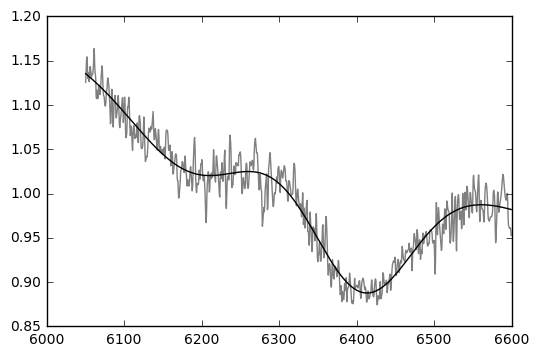

In [57]:
filename = "16abc_20160405_Gemini_N_v1.ascii"
p0 = [0, 0, -15e8, 5e8, 0.1, -15e8, 5e8, 0.2]
FitCAndSiLines(filename, p0)

Si velocity: -13.3 +/-  0.1 kkm/s
Si EW: 26.79 +/-  0.00 Angstrom
C velocity: -13.7 +/-  0.1 kkm/s
C EW: 13.02 +/-  0.00 Angstrom


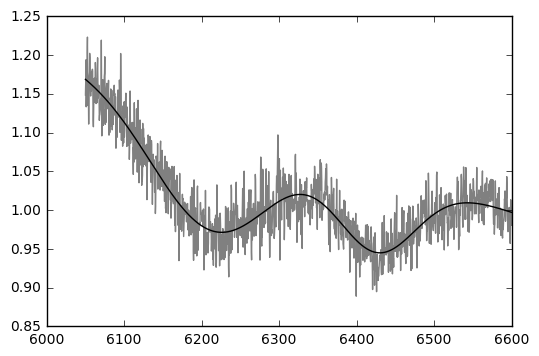

In [58]:
filename = "16abc_20160406_Keck2_v1.ascii"
p0 = [0, 0, -13e8, 5e8, 0.2, -13e8, 5e8, 0.1]
FitCAndSiLines(filename, p0)

Si velocity: -12.2 +/-  0.1 kkm/s
Si EW: 26.15 +/-  0.00 Angstrom
C velocity: -12.8 +/-  0.2 kkm/s
C EW:  8.93 +/-  0.00 Angstrom


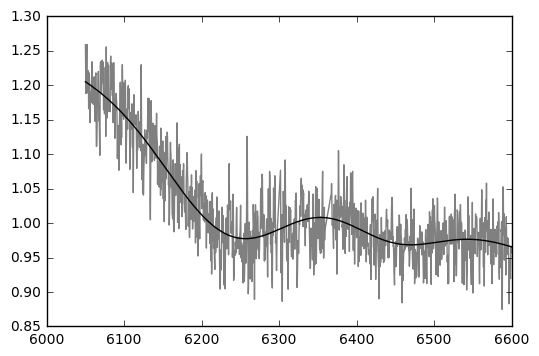

In [59]:
filename = "16abc_20160408_Keck2_v2.ascii"
p0 = [0, 0, -11e8, 5e8, 0.2, -9e8, 5e8, 0.1]
FitCAndSiLines(filename, p0, lambda0=6100, lambda1=6650)

Si velocity: -11.1 +/-  0.1 kkm/s
Si EW: 23.70 +/-  0.00 Angstrom
C velocity: -11.8 +/-  0.1 kkm/s
C EW:  2.27 +/-  0.00 Angstrom


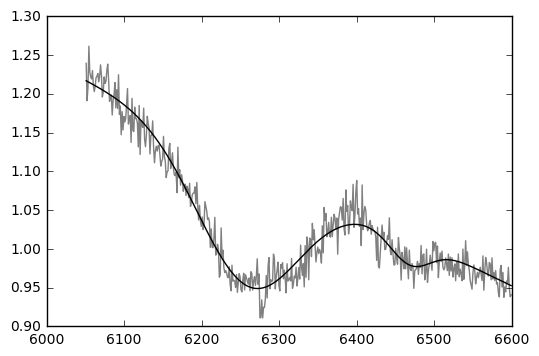

In [60]:
filename = "16abc_20160410_Keck1_v1.ascii"
p0 = [0, 0, -13e8, 5e8, 0.2, -10e8, 3e8, 0.1]
FitCAndSiLines(filename, p0)

Si velocity: -10.2 +/-  0.0 kkm/s
Si EW: 30.26 +/-  0.00 Angstrom
C velocity: -7.5 +/-  0.3 kkm/s
C EW: -2.68 +/- -0.00 Angstrom


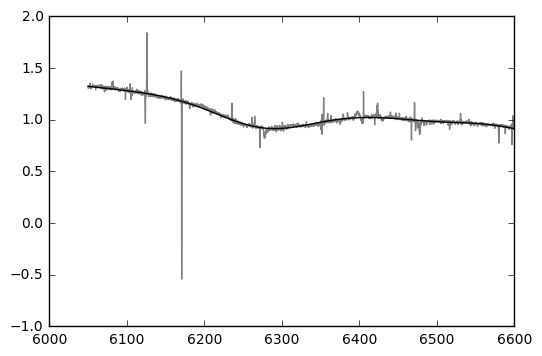

In [61]:
filename = "16abc_20160414_VLT_v1.ascii"
p0 = [0, 0, -10e8, 5e8, 0.2, -7e8, 3e8, 0.1]
FitCAndSiLines(filename, p0, lambda1=6700)

In [74]:
# C II 7234
def NewModel(wv, a, b, C_min_vel, C_width_vel, C_intensity):
    C_wv0 = 7234
    C_flux = 1 - Gaussian(wv, C_wv0, C_min_vel, C_width_vel, C_intensity)
    continuum = a * wv + b
    return continuum * C_flux

def FitCAndSiLines(filename, p0):
    spec = np.genfromtxt(filename, names=["wavelength", "flux"])
    idx = np.logical_and(spec["wavelength"] > 6950, 
                         spec["wavelength"] < 7250)
    spec = spec[idx]
    spec["flux"] /= np.median(spec["flux"])
    plt.plot(spec["wavelength"], spec["flux"], color="gray")

    popt, pcov = curve_fit(NewModel, spec["wavelength"], spec["flux"],
                           p0=p0)

    wv = np.linspace(spec["wavelength"].min(), spec["wavelength"].max(), 1001)
    plt.plot(wv, NewModel(wv, *popt), color='k')

    c = np.sqrt(2. * np.pi) / phys.c
    
    C_min_vel = popt[2]
    C_min_vel_err = np.sqrt(pcov[2][2])
    C_width_vel = popt[3]
    C_width_vel_err = np.sqrt(pcov[3][3])
    C_intensity = popt[4]
    C_intensity_err = np.sqrt(pcov[4][4])
    C_EW = c * 7234 * C_intensity * C_width_vel
    C_EW_err = c * 7234 * ((C_intensity_err / C_intensity)**2 + (C_width_vel_err / C_width_vel)**2)**0.5 * C_EW
    
    print("C velocity: %4.1f +/- %4.1f kkm/s" % (C_min_vel / 1e8, C_min_vel_err / 1e8))
    print("C EW: %5.2f +/- %5.2f Angstrom" % (C_EW, C_EW_err))

C velocity: -13.9 +/-  0.1 kkm/s
C EW: 15.06 +/-  0.00 Angstrom


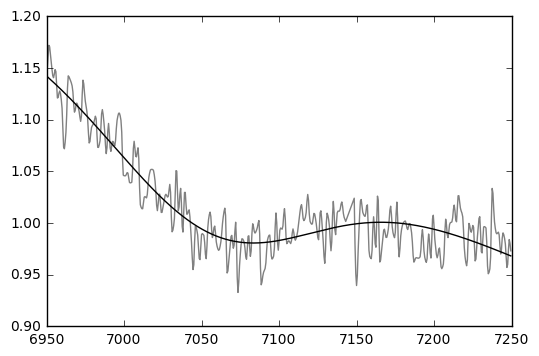

In [75]:
filename = "16abc_20160405_Gemini_N_v1.ascii"
p0 = [0, 0, -15e8, 5e8, 0.2]
FitCAndSiLines(filename, p0)

C velocity: -12.6 +/-  0.1 kkm/s
C EW: 13.56 +/-  0.00 Angstrom


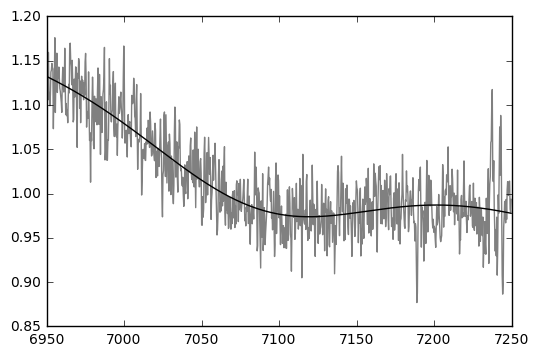

In [76]:
filename = "16abc_20160406_Keck2_v1.ascii"
p0 = [0, 0, -13e8, 5e8, 0.1]
FitCAndSiLines(filename, p0)

C velocity: -11.7 +/-  0.1 kkm/s
C EW:  5.96 +/-  0.00 Angstrom


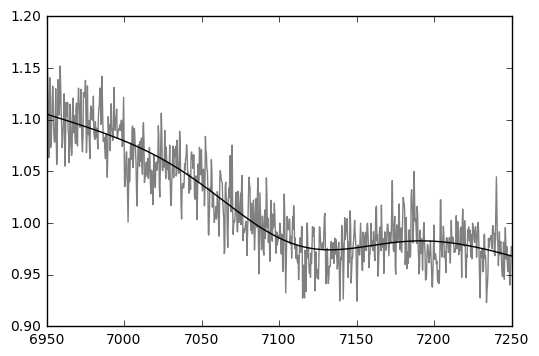

In [77]:
filename = "16abc_20160408_Keck2_v2.ascii"
p0 = [0, 0, -12e8, 5e8, 0.1]
FitCAndSiLines(filename, p0)

C velocity: -12.3 +/-  0.9 kkm/s
C EW: 16.54 +/-  0.00 Angstrom


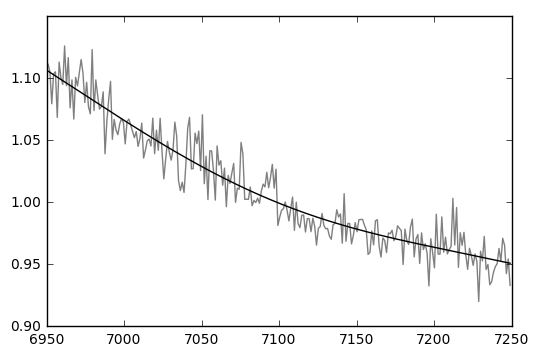

In [68]:
filename = "16abc_20160410_Keck1_v1.ascii"
p0 = [0, 0, -10e8, 3e8, 0.1]
FitCAndSiLines(filename, p0)

In [79]:
phase = np.array([-15.8, -15.1, -13.1, -11.3])
vel = np.array([14.6, 13.3, 12.2, 11.2])
vel_err = np.array([0.1, 0.1, 0.1, 0.1])
EW = np.array([14.31, 26.79, 26.15, 23.70])

C_6580_phase = np.array([-15.8, -15.1, -13.1, -11.3])
C_6580_vel = np.array([14.5, 13.7, 12.8, 11.8])
C_6580_vel_err = np.array([0.0, 0.1, 0.2, 0.1])
C_6580_EW = np.array([23.02, 13.02, 8.93, 2.27])

C_7234_phase = np.array([-15.8, -15.1, -13.1])
C_7234_vel = np.array([13.9, 12.6, 11.7])
C_7234_vel_err = np.array([0.1, 0.1, 0.1])
C_7234_EW = np.array([15.06, 13.56, 5.96])

-17.85


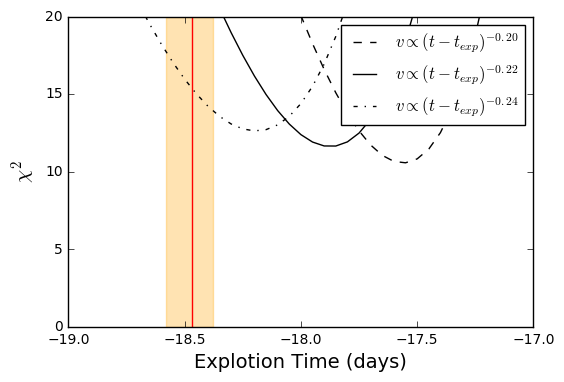

In [70]:
t_range = np.linspace(-19, -17, 41)
chi2 = np.ndarray(t_range.shape)
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.20)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
plt.plot(t_range, chi2, 'k--', label="$v\\propto (t-t_{exp})^{-0.20}$")
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.22)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
idx = np.argmin(chi2)
print(t_range[idx])
plt.plot(t_range, chi2, 'k-', label="$v\\propto (t-t_{exp})^{-0.22}$")
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.24)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
plt.plot(t_range, chi2, 'k-.', label="$v\\propto (t-t_{exp})^{-0.24}$")
plt.ylim(0, 20)

y_min, y_max = plt.ylim()
plt.plot([-18.47, -18.47], [y_min, y_max], 'r')
plt.fill_between([-18.58, -18.38], y1=y_min, y2=y_max, color='orange', alpha=0.3, zorder=1)

plt.xlabel("Explotion Time (days)", fontsize=14)
plt.ylabel("$\\chi^2$", fontsize=15)
plt.legend(loc='upper right')
plt.savefig("exp_date_chi2.pdf")

/Users/ycao/python/anaconda2/envs/astroconda/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.LineCollection object at 0x1121e5ef0> not impemented
  warnings.warn("Legend element %s not impemented" % child)
/Users/ycao/python/anaconda2/envs/astroconda/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.LineCollection object at 0x1121da128> not impemented
  warnings.warn("Legend element %s not impemented" % child)
/Users/ycao/python/anaconda2/envs/astroconda/lib/python3.5/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.LineCollection object at 0x1121da6d8> not impemented
  warnings.warn("Legend element %s not impemented" % child)


TypeError: 1 is not JSON serializable

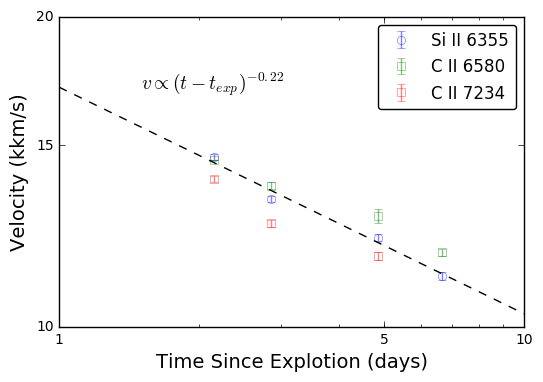

In [78]:
ax = plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

t0 = -17.95
ax.errorbar(phase - t0, vel, 
            yerr=vel_err, 
            marker='o',
            markerfacecolor='none',
            markeredgecolor='blue',
            linestyle='none', 
            label="Si II 6355",
            alpha=0.5)
ax.errorbar(C_6580_phase - t0, 
            C_6580_vel, 
            yerr=C_6580_vel_err, 
            marker='s', 
            markerfacecolor='none',
            markeredgecolor='green',
            linestyle='none', 
            label="C II 6580",
            alpha=0.5)
ax.errorbar(C_7234_phase - t0, 
            C_7234_vel, 
            yerr=C_7234_vel_err, 
            marker='s', 
            markerfacecolor='none',
            markeredgecolor='red',
            linestyle='none', 
            label="C II 7234",
            alpha=0.5)

x = (phase - t0)**(-0.22)
c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
t = np.linspace(1, 10, 100)
ax.plot(t, c * t**(-0.22), 'k--')
ax.set_xlim(1, 10)
ax.set_ylim(10, 20)
ax.set_xticks([1, 5, 10])
ax.set_xticklabels(["1", "5", "10"])
ax.set_yticks([10, 15, 20])
ax.set_yticklabels(["10", "15", "20"])
ax.set_xlabel("Time Since Explotion (days)", fontsize=14)
ax.set_ylabel("Velocity (kkm/s)", fontsize=14)
ax.legend(loc="upper right", numpoints=1, fancybox=True)
ax.text(1.5, 17, "$v\\propto (t-t_{exp})^{-0.22}$", fontsize=14)
plt.savefig("SiIIVelocity.pdf")

In [28]:
for i in range(len(t_range)):
    t0 = t_range[i]
    x = (phase - t0)**(-0.22)
    c = np.sum(x * vel / vel_err**2) / np.sum(x * x/ vel_err**2)
    chi2[i] = np.sum(((c * x - vel) / vel_err)**2)
idx = np.argmin(chi2)
chi2 -= np.min(chi2)
prob = np.exp(-chi2 / 2)
thresh = 0.997 * np.sum(prob)
i = 3
while np.sum(prob[idx-i:idx+i+1]) < thresh:
    i += 1
print(t_range[idx-i], t_range[idx], t_range[idx+i])

-18.3 -17.85 -17.4


TypeError: 1 is not JSON serializable

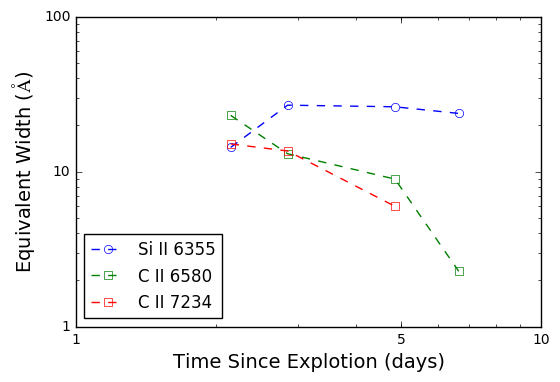

In [90]:
ax = plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

t0 = -17.95

ax.plot(phase - t0, EW, 'bo--', 
        markerfacecolor='none', 
        markeredgecolor='blue',
        label="Si II 6355")
ax.plot(C_6580_phase - t0, C_6580_EW, 'gs--', 
        markerfacecolor='none', 
        markeredgecolor='green',
        label="C II 6580")
ax.plot(C_7234_phase - t0, C_7234_EW, 'rs--', 
        markerfacecolor='none', 
        markeredgecolor='red',
        label="C II 7234")

ax.set_xlim(1, 10)
ax.set_ylim(10, 20)
ax.set_xticks([1, 5, 10])
ax.set_xticklabels(["1", "5", "10"])
ax.set_yticks([1, 10, 100])
ax.set_yticklabels(["1", "10", "100"])
ax.set_xlabel("Time Since Explotion (days)", fontsize=14)
ax.set_ylabel("Equivalent Width ($\\rm{\\AA}$)", fontsize=14)
ax.legend(loc="lower left", numpoints=1)

plt.savefig("EW.pdf")